#Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


Justification:

*   pandas (pd): Used for data manipulation and analysis, primarily for handling structured data in DataFrames.
*   numpy (np): Provides numerical operations and array handling for efficient computation.

*   seaborn (sns): Used for statistical data visualization.
*   matplotlib.pyplot (plt): Used for creating static, animated, and interactive visualizations.





#Upload and Load the Dataset

In [15]:
Data_path = "/content/preprocessed_train_data.csv"
df = pd.read_csv(Data_path,low_memory=False)

 Justification:
 - We upload the dataset to Colab and read it using Pandas.
 - This dataset is already preprocessed and cleaned.

 # Select Features for Clustering

In [16]:
features = df[['luxury_sales', 'fresh_sales', 'dry_sales']]


  - K-Means works only with numerical data.
  - We select relevant numerical columns for clustering.

# Handle missing values

In [17]:
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Normalize the Data (Feature Scaling)

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Justifcation:
 - K-Means is sensitive to feature scaling.
 - We standardize data to ensure all features contribute equally.

# Find the Optimal Number of Clusters

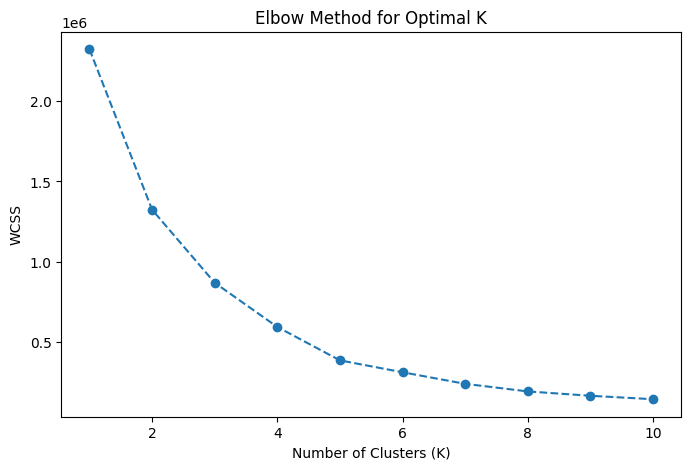

In [19]:
wcss = []  # Stores WCSS for each K

for k in range(1, 11):  # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

 Justification:
 - The Elbow Method helps determine the best value for K.
 - We check WCSS (Within-Cluster Sum of Squares) for different K values.

#  Apply K-Means Clustering

In [20]:
optimal_k = 4  # Change based on the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Initialize K-Means
df['Cluster'] = kmeans.fit_predict(scaled_features)  # Assign clusters to data points

# Display first few rows with cluster assignments
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Cluster
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,0
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,1
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,1
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,1


 Justification:
 - Based on the elbow method, we choose the best K (let’s assume K=4).
 - We fit the model and assign each data point to a cluster.

#Visualizing the Clusters

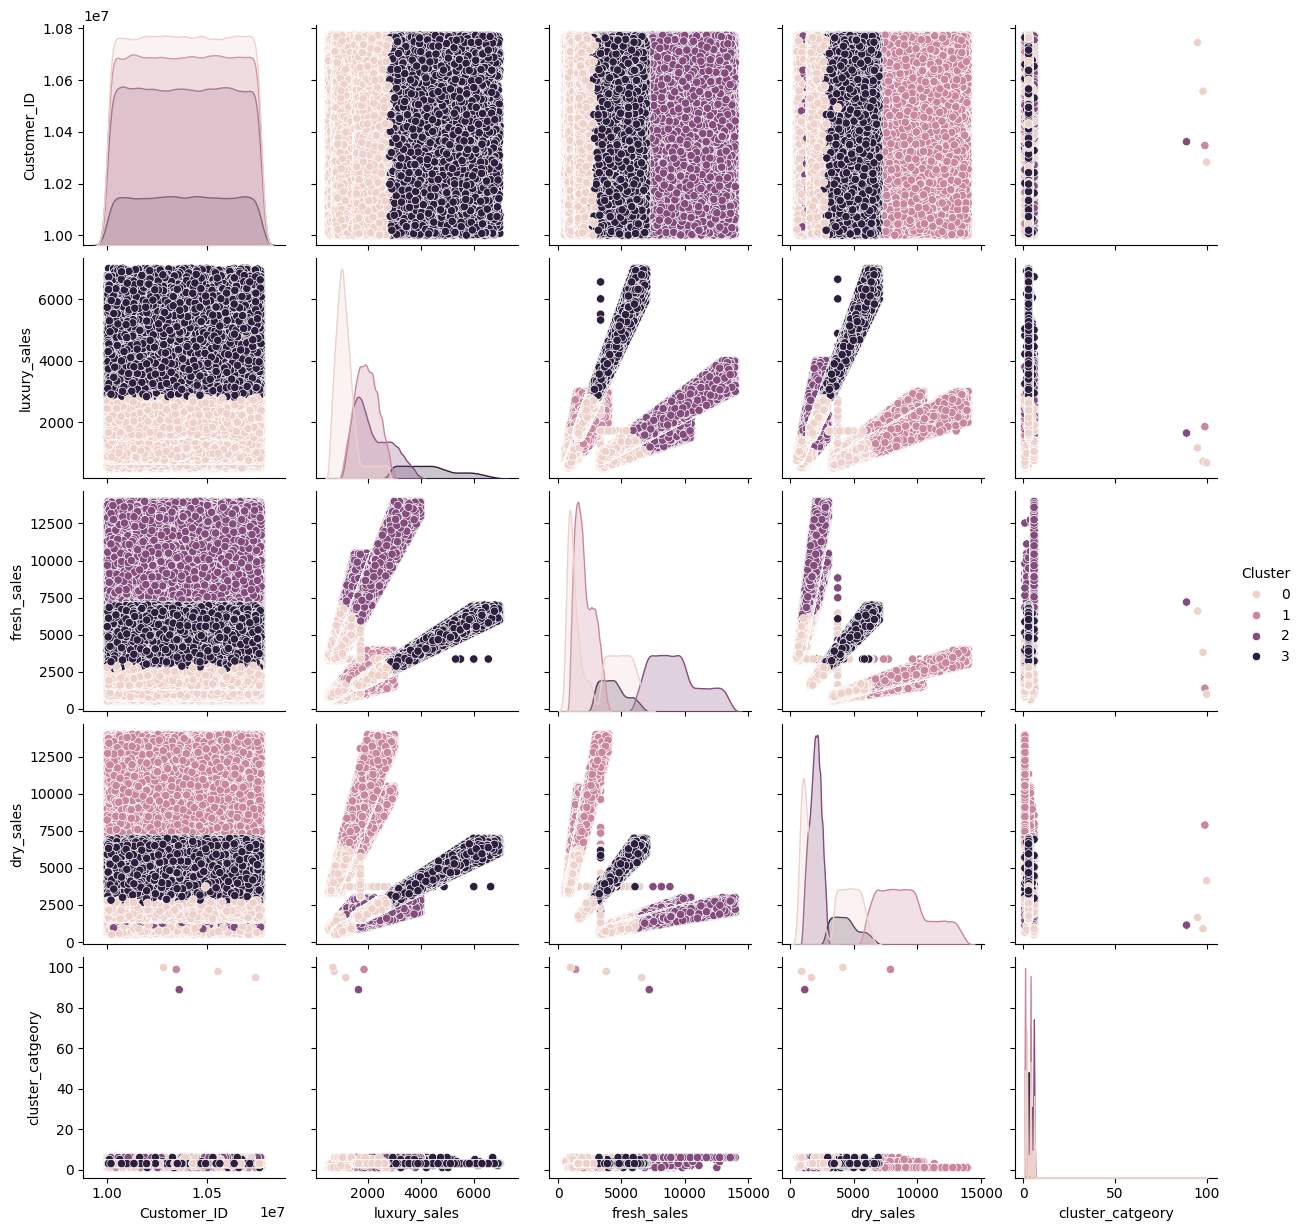

In [21]:
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

Justification:
- Helps understand how clusters are distributed across features.
- Uses pairplot to show relationships between features.

# Cluster Visualization - PCA 2D Scatter Plot

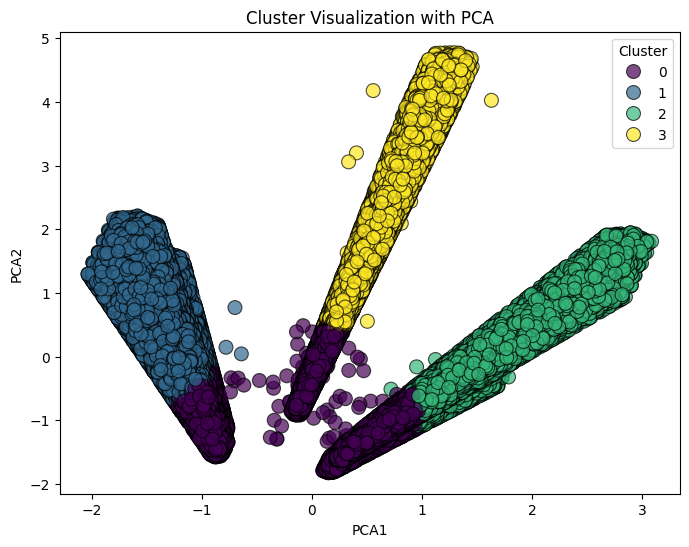

In [25]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolors='k')
plt.title('Cluster Visualization with PCA')
plt.show()


#  Analyzing Cluster Characteristics

In [ ]:
df.groupby('Cluster')[['luxury_sales', 'fresh_sales', 'dry_sales']].mean()
